# Week 2

### Level 1

Train the model on logistic regression using 5 fold cross validation error

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

X, y = load_iris(return_X_y=True)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

In [2]:
# use kfold to split the data
k_fold = KFold(n_splits=5)

[clf.fit(X[train], y[train]).score(X[test], y[test])
 for train, test in k_fold.split(X)]

[1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.8333333333333334]

In [3]:
# manually splitting the data
import numpy as np

def myDef(X, y):
    X_folds = np.array_split(X, 5)
    y_folds = np.array_split(y, 5)
    scores = list()

    for k in range(5):
        X_train = list(X_folds)
        X_test  = X_train.pop(k)
        X_train = np.concatenate(X_train)
        y_train = list(y_folds)
        y_test  = y_train.pop(k)
        y_train = np.concatenate(y_train)
        scores.append(clf.fit(X_train, y_train).score(X_test, y_test))

    print(scores) 
    
myDef(X,y)

[1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.8333333333333334]


In [4]:
#shuffle the data and calculate the scores for 3 times

from sklearn.utils import shuffle

for k in range(10):
    X, y = shuffle(X, y, random_state=k)
    myDef(X,y)

[1.0, 0.8333333333333334, 1.0, 1.0, 0.9333333333333333]
[0.9333333333333333, 1.0, 0.9666666666666667, 1.0, 0.9333333333333333]
[0.8666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667]
[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9]
[1.0, 0.9, 1.0, 0.9666666666666667, 0.9333333333333333]
[0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 1.0]
[0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0]
[1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9]
[0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9666666666666667]
[0.9666666666666667, 0.9666666666666667, 0.9, 1.0, 1.0]


 [Use error bar function to plot the results]

#### Calculate leave-one-out cross validation error for logistic regression (may be I need to find a better sample)

In [5]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
loo.get_n_splits(X)
scores = list()
X, y = load_iris(return_X_y=True)

for train_index, test_index in loo.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    scores.append(clf.fit(X_train, y_train).score(X_test, y_test))
    
print(str(len(scores)) + '--->' + str(scores))

150--->[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


#### RBF SVM model and plot for different gamma values

0.01
0.02
0.03
0.04
0.05
0.08
0.09


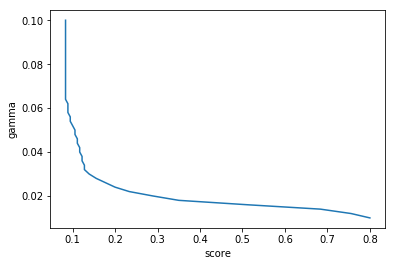

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
%matplotlib inline

iris = datasets.load_digits()
X = iris.data
y = iris.target

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order]

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]
    
score = list()
gamma = list()
    
def scoreWithGamma(g):
    clf = svm.SVC(kernel = 'rbf', gamma=g)
    s = clf.fit(X_train, y_train).score(X_test, y_test)
    score.append(s)
    gamma.append(g)
    if((((g*1000)%10) == 0)):
        print(g)
    
for i in np.arange(0.01, 0.1, 0.002):
    scoreWithGamma(i)
    
import matplotlib.pyplot as plt
plt.plot(score,gamma)
plt.ylabel('gamma')
plt.xlabel('score')
plt.show()

### Level 2

In [7]:
score = list()
gamma = list()
    
# with default gamma
def scoreWithGamma(g):
    clf = svm.SVC(kernel = 'rbf', C=g)
    s = clf.fit(X_train, y_train).score(X_test, y_test)
    score.append(s)
    gamma.append(g)
    if((((g*1000)%10) == 0)):
        print(g)
        

# plot with variable gamma but constant C
for i in np.arange(0.01, 1.2, 0.02):
    scoreWithGamma(i)
    
    


0.01
0.03
0.15
0.29
0.35
0.57
0.59
0.69
1.13
1.15
1.17


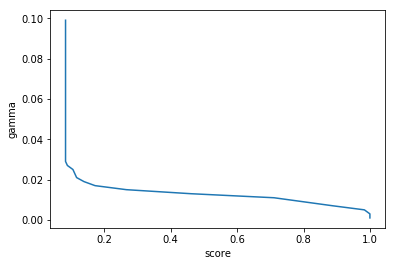

In [8]:
score = list()
gamma = list()
    
def scoreWithGamma(g,c):
    clf = svm.SVC(kernel = 'rbf', gamma=g, C=c)
    s = clf.fit(X_train, y_train).score(X_test, y_test)
    score.append(s)
    gamma.append(g)
    if((((g*1000)%10) == 0)):
        print(str(g), str(c), s)
        
g = 0.101
# plot with increasing C and decreasing gamma
for i in np.arange(0.01, 1.0, 0.02):
    g = g-0.002
    scoreWithGamma(g, i)
    
import matplotlib.pyplot as plt
plt.plot(score,gamma)
plt.ylabel('gamma')
plt.xlabel('score')
plt.show()
